In [1]:
import batoid
import matplotlib.pyplot as plt
import ipyvolume as ipv
import numpy as np

In [2]:
telescope = batoid.Optic.fromYaml("LSST_r.yaml")

In [3]:
# Make refractive interfaces partially reflective
for surface in telescope.itemDict.values():
    if isinstance(surface, batoid.RefractiveInterface):
        surface.forwardCoating = batoid.SimpleCoating(0.02, 0.98)
        surface.reverseCoating = batoid.SimpleCoating(0.02, 0.98)
    if isinstance(surface, batoid.Detector):
        surface.forwardCoating = batoid.SimpleCoating(0.02, 0.98)

In [4]:
rays = batoid.RayVector.asPolar(
    telescope, wavelength=620e-9, 
    theta_x=0.0, theta_y=np.deg2rad(1.5),
    naz=1000, nrad=300
)
rForward, rReverse = telescope.traceSplit(rays, minFlux=1e-4)

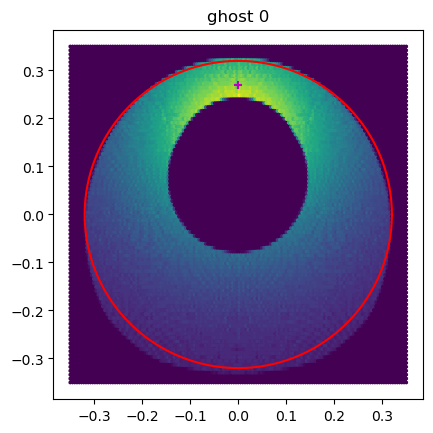

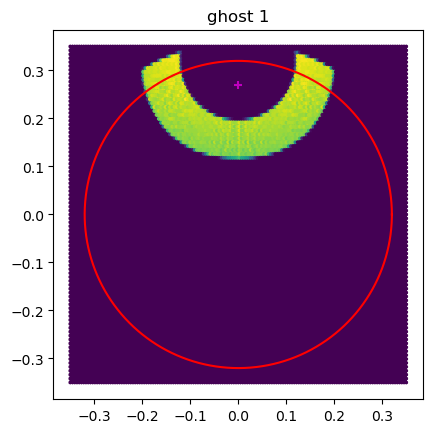

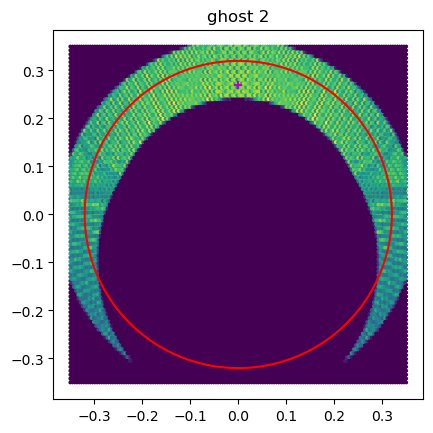

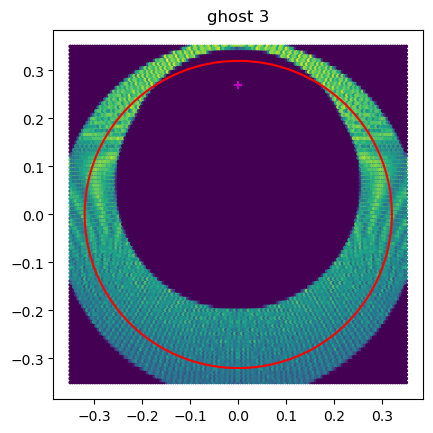

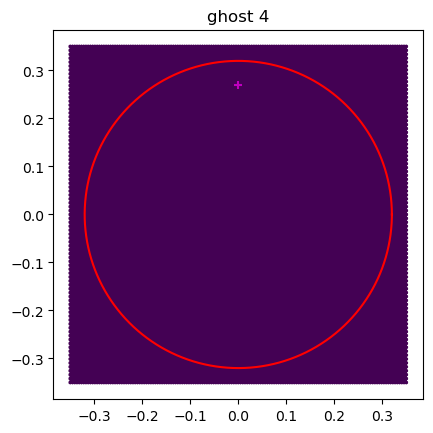

In [5]:
for i, rr in enumerate(rForward[:5]):
    plt.hexbin(rr.x, rr.y, extent=[-0.35, 0.35, -0.35, 0.35], gridsize=150)
    # plot approximate focal plane radius
    th = np.linspace(0, 2*np.pi, 1000)
    plt.plot(0.32*np.cos(th), 0.32*np.sin(th), c='r')
    # plot direct path location on focal plane
    # direct path will be rForward with fewest number of things in "path"
    w = np.argmin([len(rrr.path) for rrr in rForward])
    plt.scatter(np.mean(rForward[w].x), np.mean(rForward[w].y), marker='+', color='m')
    plt.gca().set_aspect("equal")
    plt.title(f"ghost {i}")
    plt.show()

M1
M2
M3
L1_entrance
L1_exit
L2_entrance
L2_exit
Filter_entrance
Filter_exit
Filter_entrance
Filter_exit
L3_entrance
L3_exit
Detector


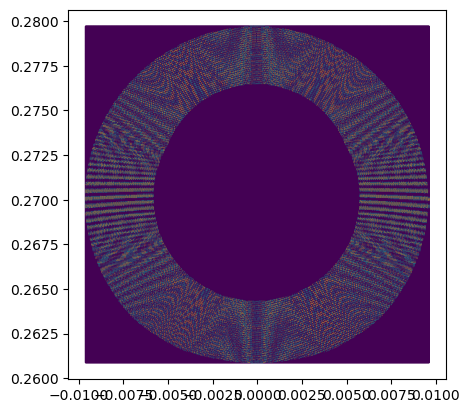

In [6]:
# Pick a few ghosts and look in more detail
ghost = rForward[13]
for item in ghost.path:
    print(item)
plt.hexbin(ghost.x, ghost.y, gridsize=1000)
plt.gca().set_aspect('equal')
plt.show()

In [7]:
ghost = rForward[13]

# polar rays make a bit of a confusing plot
# rays = batoid.RayVector.asPolar(
#     telescope, wavelength=620e-9,
#     theta_x=0.0, theta_y=np.deg2rad(1.5),
#     nrad=10, naz=30
# )

# but an xy-fan of rays is okay
rays = batoid.concatenateRayVectors([
    batoid.RayVector.asGrid(
        telescope, wavelength=620e-9, 
        theta_x=0.0, theta_y=np.deg2rad(1.5), 
        nx=1, ny=30
    ),
    batoid.RayVector.asGrid(
        telescope, wavelength=620e-9, 
        theta_x=0.0, theta_y=np.deg2rad(1.5), 
        nx=30, ny=1
    )
])
tf = telescope.traceFull(rays, path=ghost.path)

ipv.figure(width=700, height=500)
telescope.draw3d(ipv, color='black')
batoid.drawTrace3d(ipv, tf, c='r')
ipv.xlim(-1, 1)
ipv.ylim(-1, 1)
ipv.zlim(3, 5)
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…